In [2]:
import sys
import os
home = os.environ['HOME']
sys.path.append(home + '/projects/turbubox/tools/lib')
sys.path.append(home + '/projects/couchdg/utils/projection')

import numpy as np
import pandas as pd
import glob

import h5
import tables
import ulz

import matplotlib
matplotlib.rcParams.update({'font.size': 9})

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

dpi = 100
fac = 0.5
geo = (fac*1920,fac*1080)

In [3]:
import cdginterpol as cdl

In [4]:
fpath = '/mnt/data/couchdg/p4est/data/chkpt_0026.h5'
h5file = h5.File(fpath, mode="r")

In [5]:
verts = h5file.get('/0000/vertices')
level = h5file.get('/0000/levels')
state = h5file.get('/0000/data/hydro/state')
dilat = h5file.get('/0000/data/amr/dilation')
accs  = h5file.get('/0000/data/forcing/accs')

In [9]:
verts.shape, state.shape, dilat.shape

((2482, 4, 2), (2482, 4, 8, 8), (2482,))

In [7]:
image = np.zeros((1024,1024))

In [8]:
cdl.interpolate_mod.interpolate(verts,state[:,1,:,:],image)

ValueError: failed to initialize intent(inout) array -- input not fortran contiguous -- expected elsize=4 but got 8

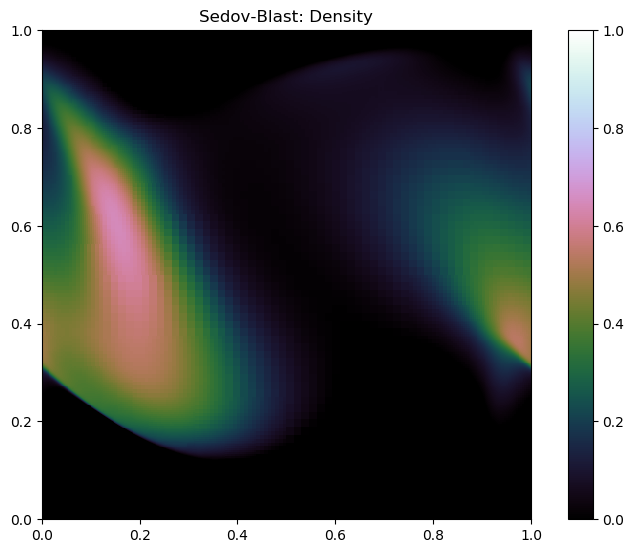

In [236]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

plt.title("Sedov-Blast: Density")

for data,vert in zip(state,verts):
    extent = vert2extent(vert,shrink=0.0)
    #print(extent)
    plt.imshow(
        np.log10(data[0]),
        extent = extent,
        vmin = 0.0,
        vmax = 1.0,
        origin='lower',
        interpolation = None,
        cmap = plt.get_cmap('cubehelix'),
    )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

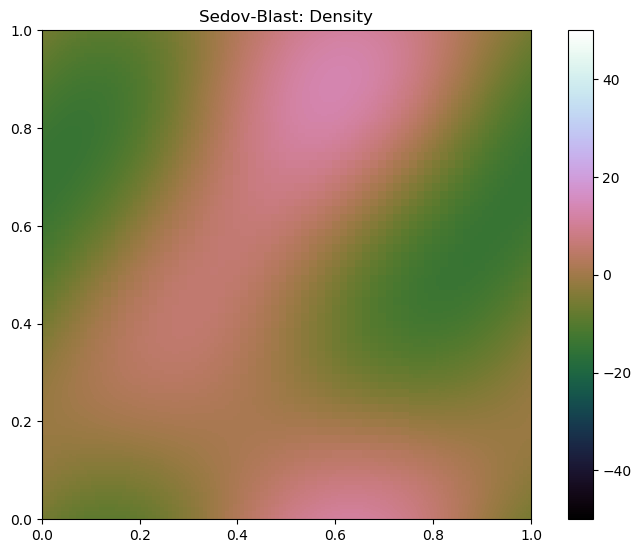

In [237]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

plt.title("Sedov-Blast: Density")

for data,vert in zip(accs,verts):
    extent = vert2extent(vert,shrink=0.0)
    #print(extent)
    plt.imshow(
        data[2],
        extent = extent,
        vmin = -50.0,
        vmax =  50.0,
        origin='lower',
        interpolation = None,
        cmap = plt.get_cmap('cubehelix'),
    )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

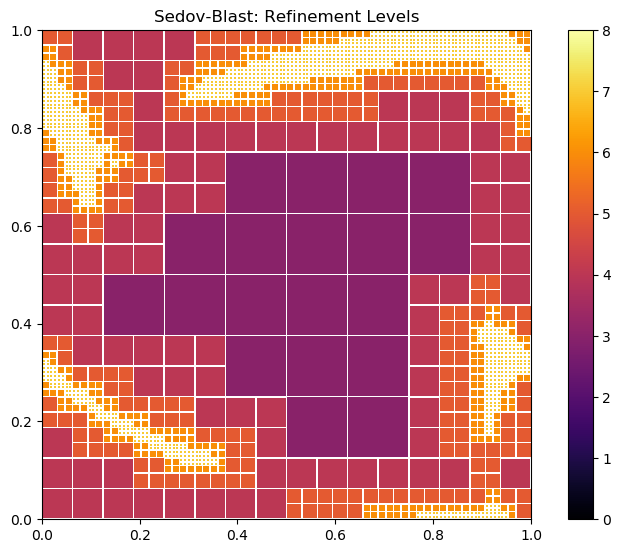

In [238]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

dummy = np.ones(state[0,0,:,:].shape)

plt.title("Sedov-Blast: Refinement Levels")

for data,vert in zip(level,verts):
    extent = vert2extent(vert,shrink=0.002)
    #print(extent)
    plt.imshow(
        dummy*data,
        extent = extent,
        vmin = 0,
        vmax = 8,
        origin='lower',
        interpolation = None,
        cmap = plt.get_cmap('inferno'),
    )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

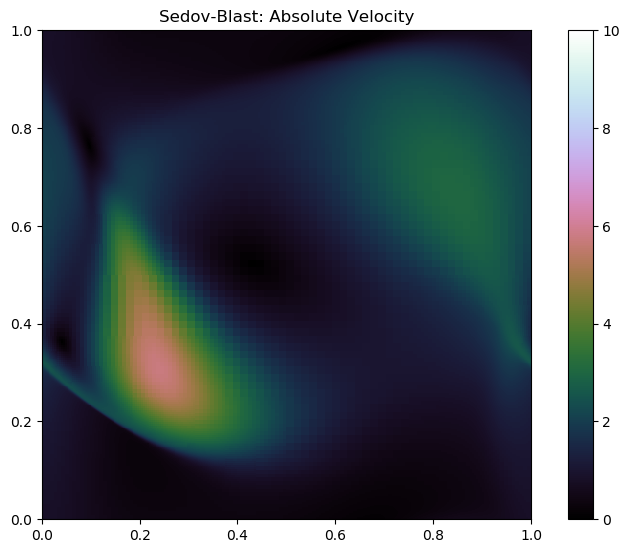

In [239]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

plt.title("Sedov-Blast: Absolute Velocity")

for data,vert in zip(state,verts):
    extent = vert2extent(vert,shrink=0.0)
    #print(extent)
    plt.imshow(
        np.sqrt(data[1]**2 + data[2]**2),
        extent = extent,
        vmin = 0,
        vmax = 10,
        origin='lower left',
        interpolation = None,
        cmap = plt.get_cmap('cubehelix'),
    )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()

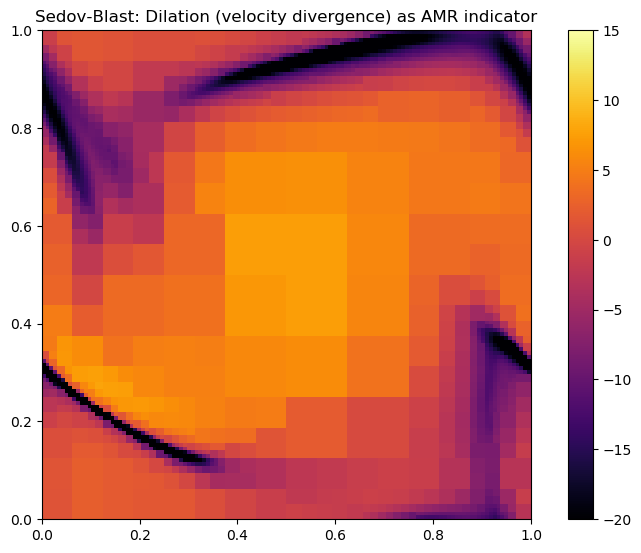

In [240]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi, frameon=False)

dummy = np.ones(state[0,0,:,:].shape)

plt.title("Sedov-Blast: Dilation (velocity divergence) as AMR indicator")

for data,vert in zip(dilat,verts):
    extent = vert2extent(vert,shrink=0.0)
    #print(extent)
    plt.imshow(
        dummy*data,
        extent = extent,
        vmin = -20,
        vmax =  15,
        origin='lower',
        interpolation = None,
        cmap = plt.get_cmap('inferno'),
    )
    
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()